Дані згенеровано (1000 значень).
Найкраще значення K: 38
Мінімальна MSE: 0.0189


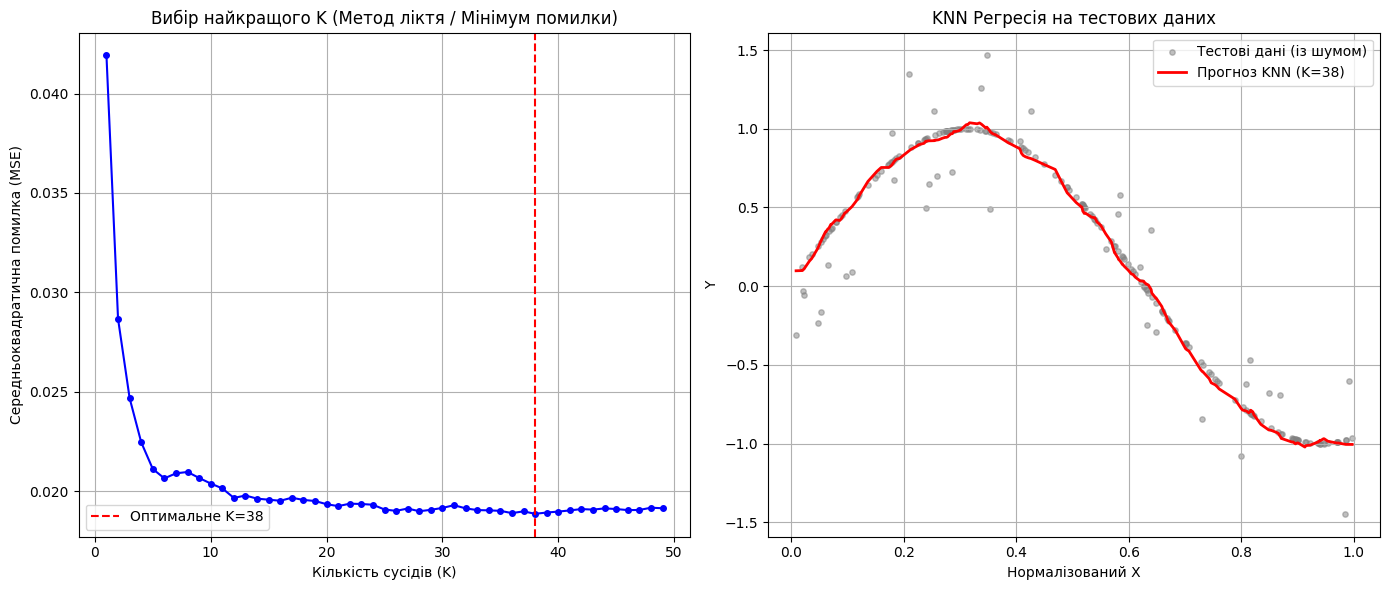

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# === Крок 1: Генерація даних ===
# Генеруємо 1000 значень.
# Для прикладу візьмемо функцію y = sin(x) і додамо до неї випадковий шум,
# щоб завдання регресії було цікавішим.
np.random.seed(42)
# Генеруємо X в діапазоні від 0 до 10
X = np.sort(5 * np.random.rand(1000, 1), axis=0)
# Генеруємо y
y = np.sin(X).ravel()
# Додаємо шум до кожної 5-ї точки, щоб симулювати реальні "брудні" дані
y[::5] += 1 * (0.5 - np.random.rand(200))

print("Дані згенеровано (1000 значень).")

# === Крок 2: Нормалізація ===
# KNN чутливий до масштабу даних, тому використовуємо MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === Крок 3: Розділення на навчальну і тестову вибірки ===
# 80% - тренування, 20% - тест
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === Крок 4 та 5: Навчання з різними K та вибір найкращого ===
k_values = range(1, 50) # Перевіримо K від 1 до 50
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Використовуємо MSE (середньоквадратичну помилку) як метрику якості
    mse_values.append(mean_squared_error(y_test, y_pred))

# Знаходимо K з мінімальною помилкою
best_k_index = np.argmin(mse_values)
best_k = k_values[best_k_index]
min_mse = mse_values[best_k_index]

print(f"Найкраще значення K: {best_k}")
print(f"Мінімальна MSE: {min_mse:.4f}")

# === Крок 6: Візуалізація ===
plt.figure(figsize=(14, 6))

# Графік 1: Залежність якості (MSE) від K
plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='blue', markersize=4)
plt.axvline(best_k, color='red', linestyle='--', label=f'Оптимальне K={best_k}')
plt.title('Вибір найкращого K (Метод ліктя / Мінімум помилки)')
plt.xlabel('Кількість сусідів (K)')
plt.ylabel('Середньоквадратична помилка (MSE)')
plt.legend()
plt.grid(True)

# Графік 2: Результат регресії для найкращого K
# Навчимо модель ще раз на найкращому K для візуалізації
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Сортуємо тестові дані для коректного відображення лінії графіку
sorted_idx = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_idx]
y_pred_sorted = knn_best.predict(X_test_sorted)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='gray', s=15, alpha=0.5, label='Тестові дані (із шумом)')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label=f'Прогноз KNN (K={best_k})')
plt.title(f'KNN Регресія на тестових даних')
plt.xlabel('Нормалізований X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()